# Data extract through AIP and Preprocessing 

In [1]:
from alpha_vantage.timeseries import TimeSeries
api_key = 'RDW63LUED9U3S55M'
symbol = 'IIFL.BSE'

def get_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data
def prepare_data(data):
    data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return data

data = get_stock_data(symbol,api_key)
df = prepare_data(data)



In [2]:
df =df.reset_index()
df


,date,Open,High,Low,Close,Volume
0,2024-03-05,478.5000,478.5000,478.5000,478.5000,62795.0
1,2024-03-04,621.5500,621.5500,595.0000,598.1000,22171.0
2,2024-03-01,589.5500,624.4000,589.5000,622.0500,33737.0
3,2024-02-29,589.9500,601.7000,576.1500,589.5000,29850.0
4,2024-02-28,619.9500,619.9500,568.0500,580.4500,34461.0
...,...,...,...,...,...,...
4626,2005-05-24,39.4187,39.6098,38.1286,38.4153,1189005.0
4627,2005-05-23,40.1354,40.4938,38.5587,39.1081,1972820.0
4628,2005-05-20,41.0910,41.4971,39.4904,39.7293,4476020.0
4629,2005-05-19,40.2549,41.9272,40.2549,40.5415,8169480.0


In [3]:
df['Tommorow']=df['Close'].shift(-1)
df.head()

,date,Open,High,Low,Close,Volume,Tommorow
0,2024-03-05,478.50,478.50,478.50,478.50,62795.0,598.10
1,2024-03-04,621.55,621.55,595.00,598.10,22171.0,622.05
2,2024-03-01,589.55,624.40,589.50,622.05,33737.0,589.50
3,2024-02-29,589.95,601.70,576.15,589.50,29850.0,580.45
4,2024-02-28,619.95,619.95,568.05,580.45,34461.0,607.30


In [4]:
df['Target']=(df['Tommorow']>df['Close']).astype(int)

In [5]:
df = df.dropna(axis=0, how='any')
df.tail()

,date,Open,High,Low,Close,Volume,Tommorow,Target
4625,2005-05-25,38.8215,38.8215,37.5553,37.6269,856620.0,38.4153,1
4626,2005-05-24,39.4187,39.6098,38.1286,38.4153,1189005.0,39.1081,1
4627,2005-05-23,40.1354,40.4938,38.5587,39.1081,1972820.0,39.7293,1
4628,2005-05-20,41.0910,41.4971,39.4904,39.7293,4476020.0,40.5415,1
4629,2005-05-19,40.2549,41.9272,40.2549,40.5415,8169480.0,39.8009,0


In [6]:
df.shape

(4630, 8)

# Data Analysis and Visualization

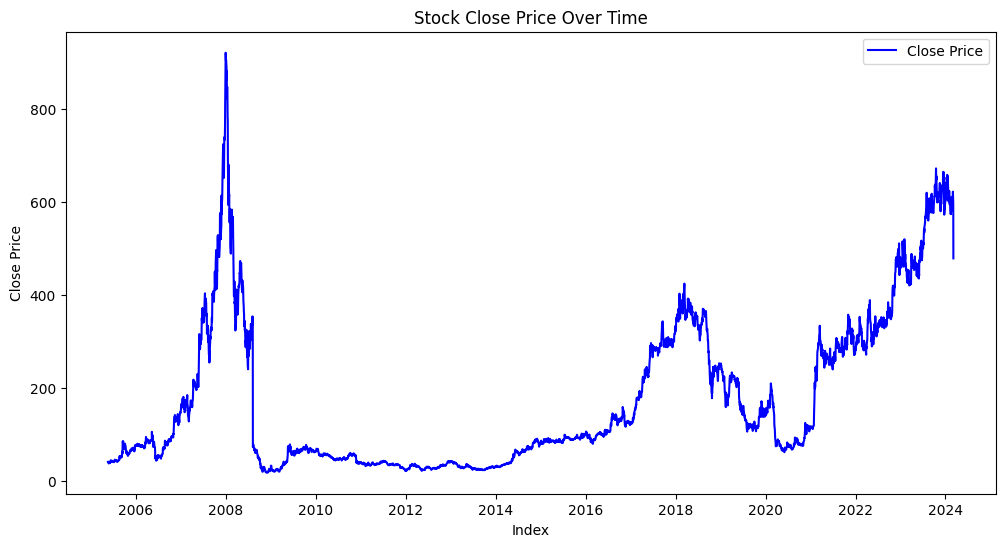

In [7]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [8]:
df.describe()

,date,Open,High,Low,Close,Volume,Tommorow,Target
count,4630,4630.000000,4630.000000,4630.000000,4630.000000,4.630000e+03,4630.000000,4630.000000
mean,2014-10-11 13:37:02.203023616,175.623952,179.833628,171.009935,175.059050,4.492532e+05,174.964298,0.505400
min,2005-05-19 00:00:00,16.747000,17.439800,16.436400,17.153100,7.200000e+01,17.153100,0.000000
25%,2010-02-03 06:00:00,48.377500,49.918450,47.260675,48.299825,1.338725e+04,48.281900,0.000000
50%,2014-10-09 12:00:00,93.434300,95.524650,92.144200,93.052000,4.456850e+04,93.016200,1.000000
75%,2019-06-26 18:00:00,289.587075,296.362500,282.837500,287.989475,3.272788e+05,287.732700,1.000000
max,2024-03-05 00:00:00,925.981200,939.837500,915.756300,921.155400,2.791319e+07,921.155400,1.000000
std,NaN,165.773841,169.555941,161.464097,165.157222,1.336281e+06,165.108934,0.500025


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4630 entries, 0 to 4629
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      4630 non-null   datetime64[ns]
 1   Open      4630 non-null   float64       
 2   High      4630 non-null   float64       
 3   Low       4630 non-null   float64       
 4   Close     4630 non-null   float64       
 5   Volume    4630 non-null   float64       
 6   Tommorow  4630 non-null   float64       
 7   Target    4630 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 325.5 KB


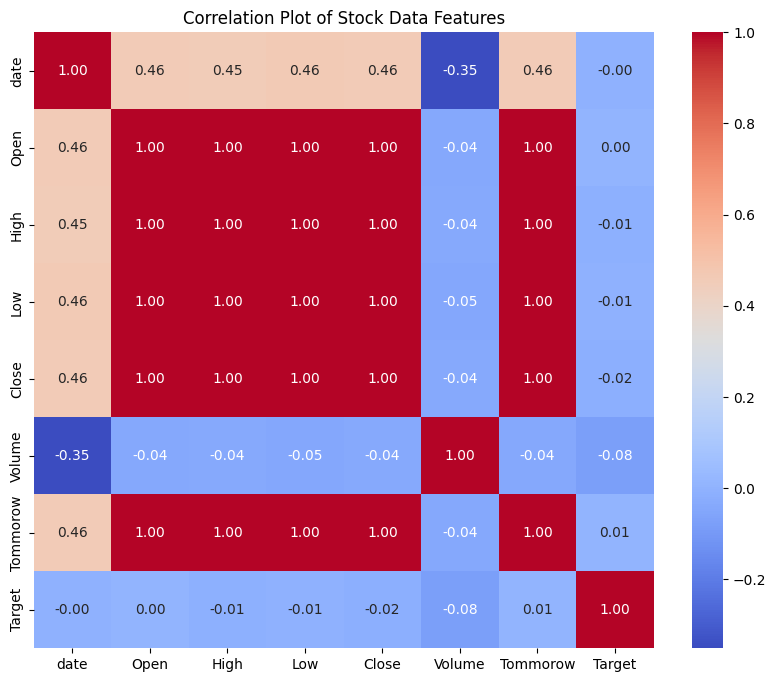

In [10]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [11]:
df.head()

,date,Open,High,Low,Close,Volume,Tommorow,Target
0,2024-03-05,478.50,478.50,478.50,478.50,62795.0,598.10,1
1,2024-03-04,621.55,621.55,595.00,598.10,22171.0,622.05,1
2,2024-03-01,589.55,624.40,589.50,622.05,33737.0,589.50,0
3,2024-02-29,589.95,601.70,576.15,589.50,29850.0,580.45,0
4,2024-02-28,619.95,619.95,568.05,580.45,34461.0,607.30,1


# Model training

In [21]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Target', 'High', 'date'])
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3704, 5)
X_test shape: (926, 5)
y_train shape: (3704,)
y_test shape: (926,)


In [23]:
X

,Open,Low,Close,Volume,Tommorow
0,478.5000,478.5000,478.5000,62795.0,598.1000
1,621.5500,595.0000,598.1000,22171.0,622.0500
2,589.5500,589.5000,622.0500,33737.0,589.5000
3,589.9500,576.1500,589.5000,29850.0,580.4500
4,619.9500,568.0500,580.4500,34461.0,607.3000
...,...,...,...,...,...
4625,38.8215,37.5553,37.6269,856620.0,38.4153
4626,39.4187,38.1286,38.4153,1189005.0,39.1081
4627,40.1354,38.5587,39.1081,1972820.0,39.7293
4628,41.0910,39.4904,39.7293,4476020.0,40.5415


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with feature_range=(0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

# Predict and Evaluate the Model

In [16]:
# Predict on the scaled test data
predictions = model.predict(X_test_scaled)


In [17]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.6025917926565875


# Predict Next day Market

In [25]:
# Extract the last row of the DataFrame
last_row = df.iloc[-1]

# Extract the relevant features (excluding 'High') and reshape into the format expected by your model
# X_new = np.array([[937.70, 918.70, 937.70, 924.45, 380102.0]])
X_new = last_row[['Open', 'Low', 'Close', 'Volume','Tommorow']].values.reshape(1, -1)

# Scale the new feature data using the same scaler used for training
X_new_scaled = scaler.transform(X_new)

# Predict the next day's high price
next_day_high = model.predict(X_new_scaled)

print("Predicted next day's price:", next_day_high)


Predicted next day's price: [0]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
